#Data Science Lifecycle
© 2023, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
# Combine the datasets for preprocessing
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Display the first few rows of the combined dataset
combined_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [ ]:
rows = combined_data.shape[0]
columns = combined_data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 614 rows and 13 columns.


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Where did you find some missing values?     

**gender,married,dependents,slef_employed,loanAmount,loan_amount_term,credit_history**



##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:
combined_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Print the unique values of the variable Credit_History

In [ ]:
unique_credit_history = combined_data['Credit_History'].unique()
print("Unique values of Credit_History:", unique_credit_history)

Unique values of Credit_History: [ 1.  0. nan]


Do the same with the variable Loan_Amount_Term

*   List item
*   List item



In [ ]:
unique_loan_amount_terms = combined_data['Loan_Amount_Term'].unique()
print("Unique values of Loan_Amount_Term:", unique_loan_amount_terms)

Unique values of Loan_Amount_Term: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

categorical_description = combined_data[categorical_features].describe(include='O')
print(categorical_description)


       Gender Married Dependents Education Self_Employed Property_Area  \
count     601     611        599       614           582           614   
unique      2       2          4         2             2             3   
top      Male     Yes          0  Graduate            No     Semiurban   
freq      489     398        345       480           500           233   

       Loan_Status  
count          614  
unique           2  
top              Y  
freq           422  




```
# This is formatted as code
```

Interpret the results you obtained for the variable Gender

   **count 601
  unique 2
  top male
  freq 489**

Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [ ]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for feature in categorical_features:
    value_counts = combined_data[feature].value_counts()
    print(f"Frequency counts for '{feature}':")
    print(value_counts)
    print()


Frequency counts for 'Gender':
Male      489
Female    112
Name: Gender, dtype: int64

Frequency counts for 'Married':
Yes    398
No     213
Name: Married, dtype: int64

Frequency counts for 'Dependents':
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency counts for 'Education':
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency counts for 'Self_Employed':
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency counts for 'Credit_History':
1.0    475
0.0     89
Name: Credit_History, dtype: int64

Frequency counts for 'Property_Area':
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency counts for 'Loan_Status':
Y    422
N    192
Name: Loan_Status, dtype: int64



In [ ]:
#Test Your Zaka
#Dependents

Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [ ]:
removeNA_df = combined_data.copy()
removeNA_df.dropna(inplace=True)
print(removeNA_df)
combined_data.isnull().sum()

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Plot the distribution and the boxplot for the variable 'LoanAmount'

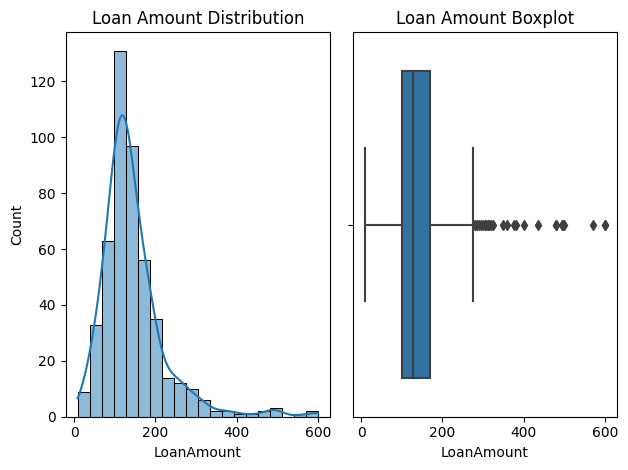

In [ ]:
# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=removeNA_df, x='LoanAmount', bins=20, kde=True)
plt.title('Loan Amount Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=removeNA_df, x='LoanAmount')
plt.title('Loan Amount Boxplot')

plt.tight_layout()
# Show the plots
plt.show()


* Is there any outlier?
* Is the data skewed?

**No outlier but skewed is found**

Do the same for the variable 'ApplicantIncome'

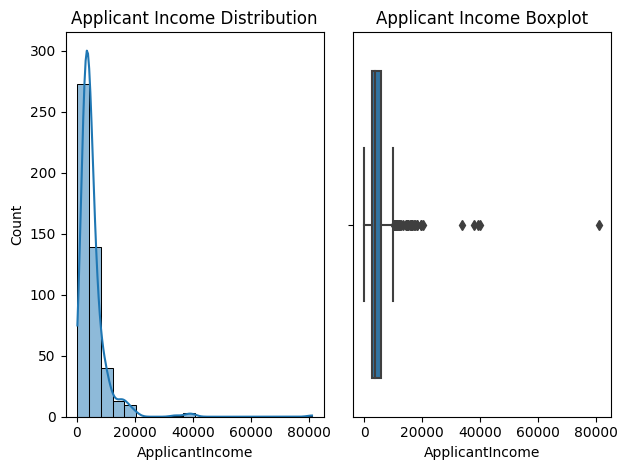

In [ ]:
# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=removeNA_df, x='ApplicantIncome', bins=20, kde=True)
plt.title('Applicant Income Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=removeNA_df, x='ApplicantIncome')
plt.title('Applicant Income Boxplot')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* Is there any outlier?
* Is the data skewed?

**outlier and skewed is found**

Do the same for 'CoapplicantIncome'

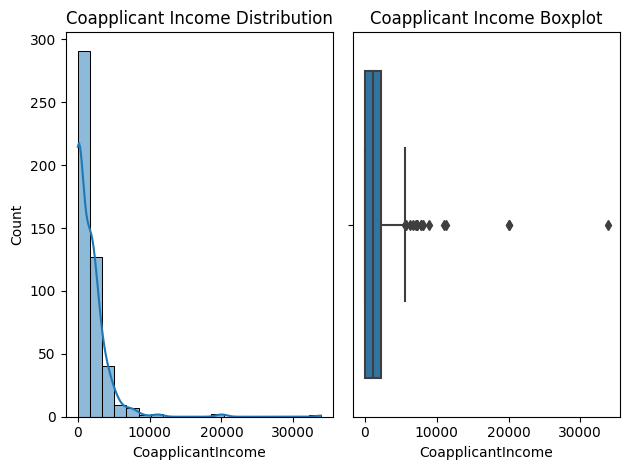

In [ ]:
# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=removeNA_df, x='CoapplicantIncome', bins=20, kde=True)
plt.title('Coapplicant Income Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=removeNA_df, x='CoapplicantIncome')
plt.title('Coapplicant Income Boxplot')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**outlier is found but no skewed**

Do the same for 'Loan_Amount_Term'

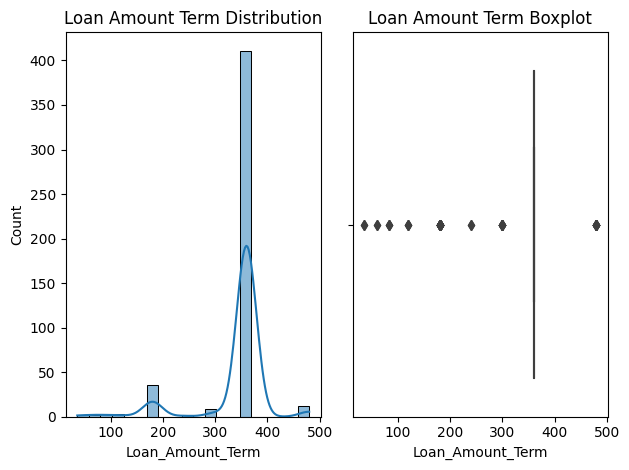

In [ ]:
#Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(data=removeNA_df, x='Loan_Amount_Term', bins=20, kde=True)
plt.title('Loan Amount Term Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=removeNA_df, x='Loan_Amount_Term')
plt.title('Loan Amount Term Boxplot')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

What do you think about outliers in this case?

**outlier with big presence between 350 and 400**

Plot the value_counts for 'Loan_Amount_term'

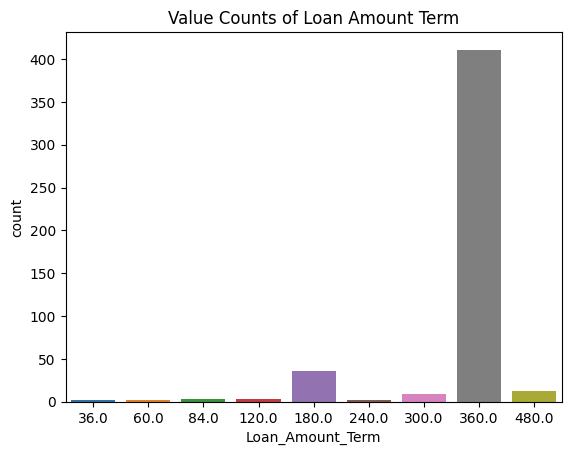

In [ ]:
sns.countplot(data=removeNA_df, x='Loan_Amount_Term')
plt.title('Value Counts of Loan Amount Term')

# Show the plot
plt.show()

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

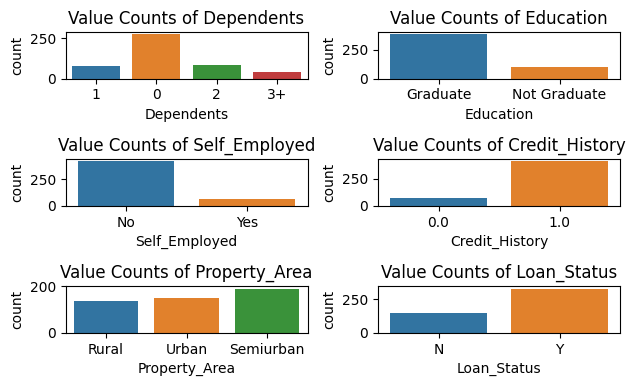

In [ ]:
categorical_variables = ['Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

# Create subplots
for i, col in enumerate(categorical_variables, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=removeNA_df, x=col)
    plt.title(f'Value Counts of {col}')
    plt.tight_layout()

# Show the plots
plt.show()

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

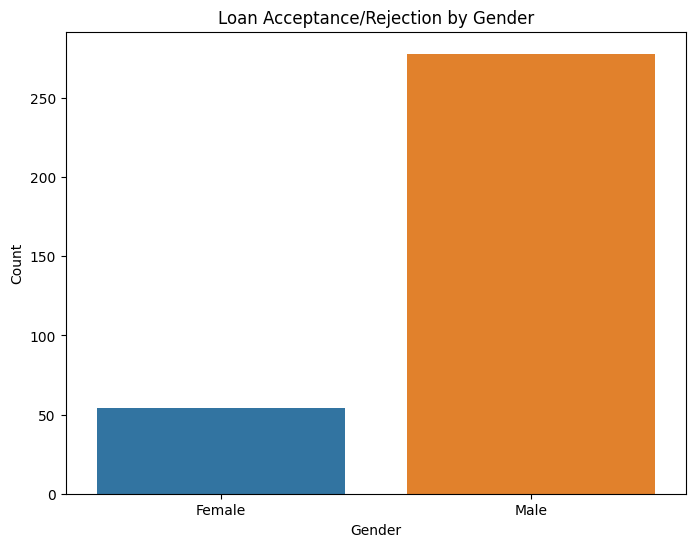

In [ ]:
gender_loan_crosstab = pd.crosstab(removeNA_df['Gender'], removeNA_df['Loan_Status'])

# Plot the crosstab using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_loan_crosstab.reset_index(), x='Gender', y='Y')
plt.title('Loan Acceptance/Rejection by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Does the Gender affect the acceptance of the Loan?

**yes for male gender has more acceptance of the loan approximately times 5**

Do the same with Credit_history and Loan_Status

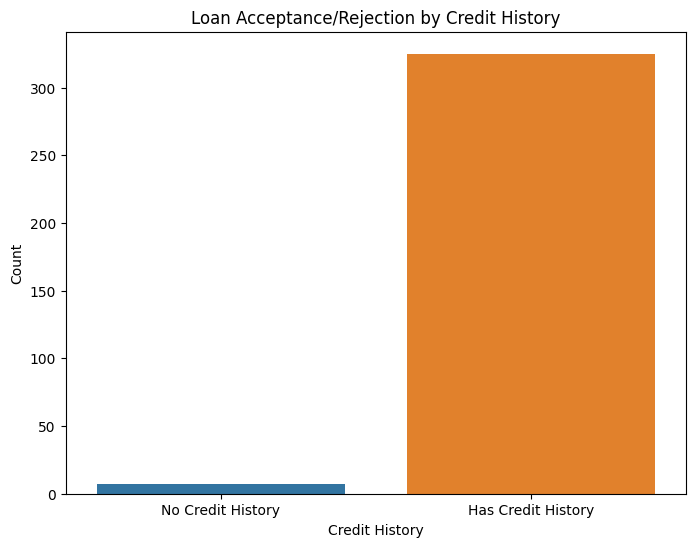

In [ ]:
credit_loan_crosstab = pd.crosstab(removeNA_df['Credit_History'], removeNA_df['Loan_Status'])

# Plot the crosstab using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=credit_loan_crosstab.reset_index(), x='Credit_History', y='Y')
plt.title('Loan Acceptance/Rejection by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Credit History', 'Has Credit History'])  # Assuming 0 represents No and 1 represents Yes
plt.show()

Does the Credit History affect the acceptance of the Loan?

**yes the credit histort affect clearly the acceptance of the loan**


Do the same with Dependents and Loan_Status

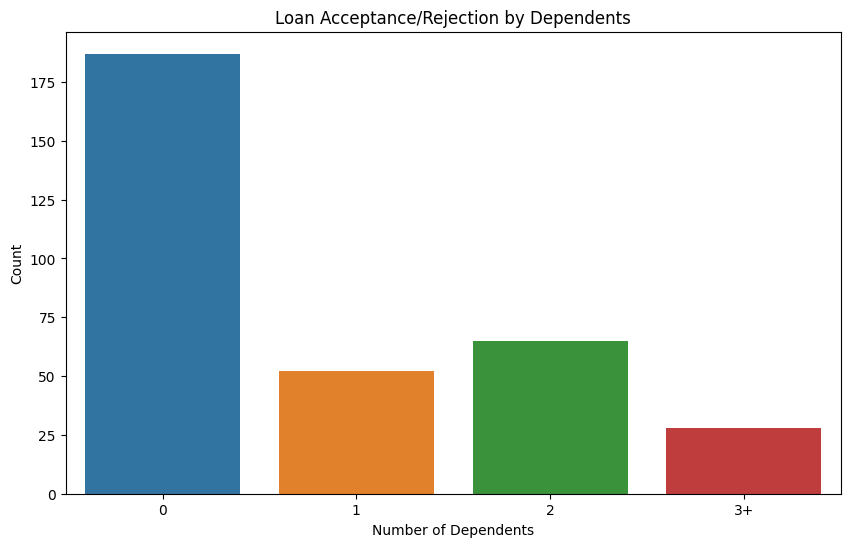

In [ ]:
dependents_loan_crosstab = pd.crosstab(removeNA_df['Dependents'], removeNA_df['Loan_Status'])

# Plot the crosstab using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=dependents_loan_crosstab.reset_index(), x='Dependents', y='Y')
plt.title('Loan Acceptance/Rejection by Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

Does the number of dependents affect the acceptance of the Loan?

**yes for zero number of dependents affect the acceptance of the loan**

Do the same between Education and Loan_Status

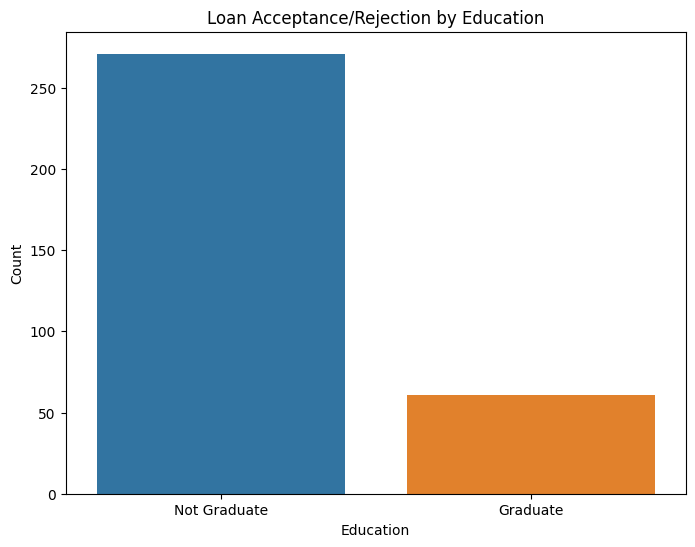

In [ ]:
education_loan_crosstab = pd.crosstab(removeNA_df['Education'], removeNA_df['Loan_Status'])

# Plot the crosstab using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=education_loan_crosstab.reset_index(), x='Education', y='Y')
plt.title('Loan Acceptance/Rejection by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Graduate', 'Graduate'])  # Assuming 0 represents Not Graduate and 1 represents Graduate
plt.show()

Does the level of education affect the acceptance of the Loan?

 **yes not graduate people has more chance to acceptance of the loan**

Do the same between Married and Loan_Status

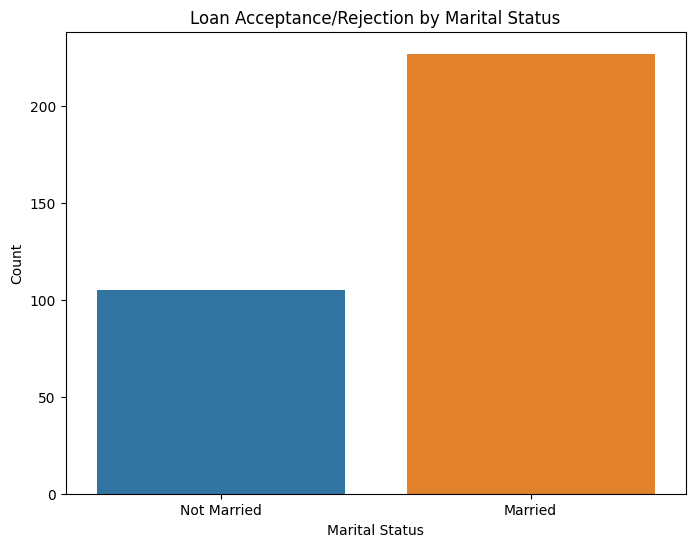

In [ ]:
married_loan_crosstab = pd.crosstab(removeNA_df['Married'], removeNA_df['Loan_Status'])

# Plot the crosstab using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=married_loan_crosstab.reset_index(), x='Married', y='Y')
plt.title('Loan Acceptance/Rejection by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Married', 'Married'])  # Assuming 0 represents Not Married and 1 represents Married
plt.show()

Does the marriage affect the acceptance of the Loan?

**Married has more chance for acceptance of the loan**

Do the same between Property_Area and Loan_Status


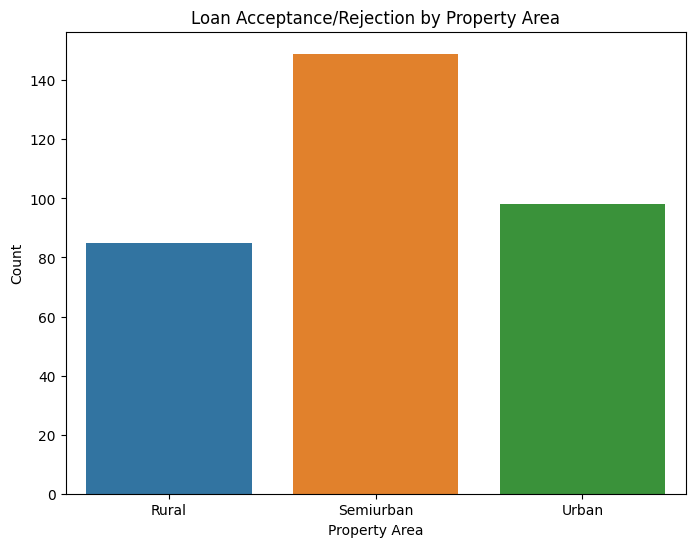

In [ ]:
property_loan_crosstab = pd.crosstab(removeNA_df['Property_Area'], removeNA_df['Loan_Status'])

# Plot the crosstab using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=property_loan_crosstab.reset_index(), x='Property_Area', y='Y')
plt.title('Loan Acceptance/Rejection by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

Does the Property Area affect the acceptance of the Loan?

**yes semiurban property area has more chance for the acceptance of the loan**

Do the same between Self_Employed and Loan_Status

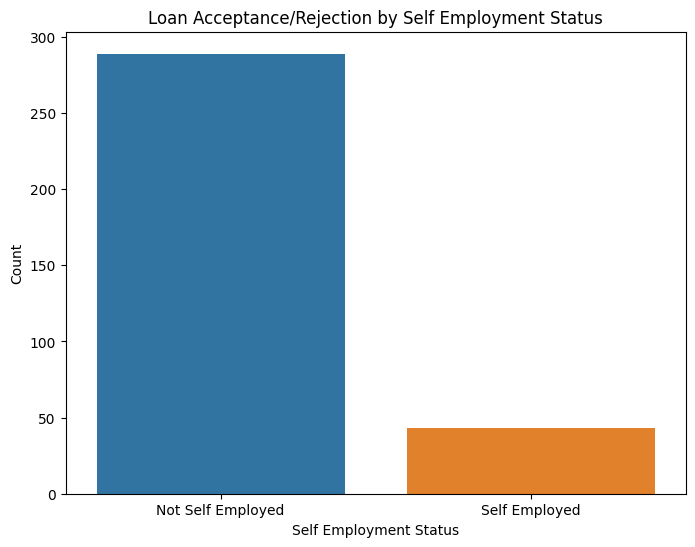

In [ ]:
self_employed_loan_crosstab = pd.crosstab(removeNA_df['Self_Employed'], removeNA_df['Loan_Status'])

# Plot the crosstab using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=self_employed_loan_crosstab.reset_index(), x='Self_Employed', y='Y')
plt.title('Loan Acceptance/Rejection by Self Employment Status')
plt.xlabel('Self Employment Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Self Employed', 'Self Employed'])  # Assuming 0 represents Not Self Employed and 1 represents Self Employed
plt.show()

Does the Self Employed Property affect the acceptance of the Loan?

**not self employed affect the acceptance of the loan**

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

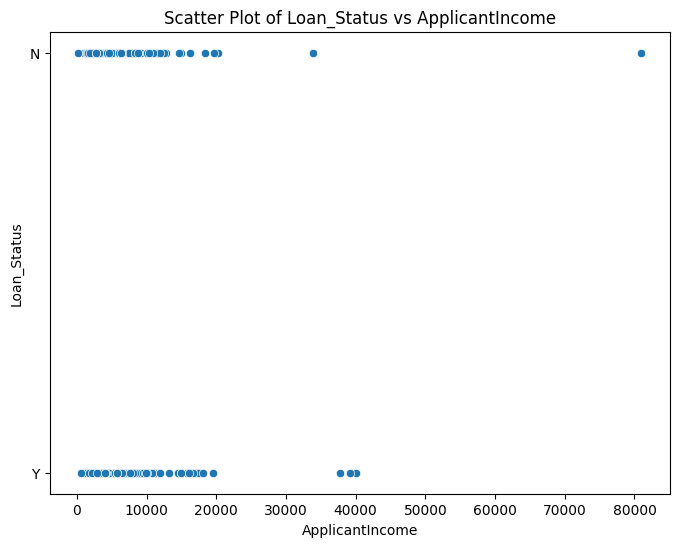

In [ ]:
plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(data=removeNA_df, x='ApplicantIncome', y='Loan_Status')
plt.title('Scatter Plot of Loan_Status vs ApplicantIncome')

# Show the plot
plt.show()

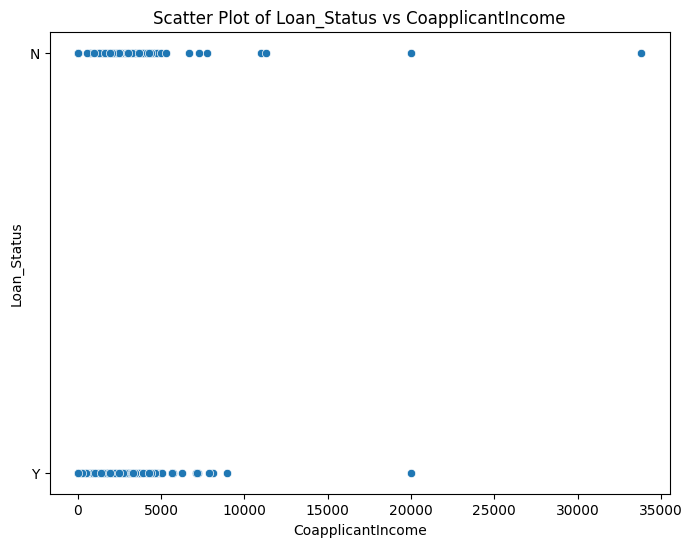

In [ ]:
plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(data=removeNA_df, x='CoapplicantIncome', y='Loan_Status')
plt.title('Scatter Plot of Loan_Status vs CoapplicantIncome')

# Show the plot
plt.show()

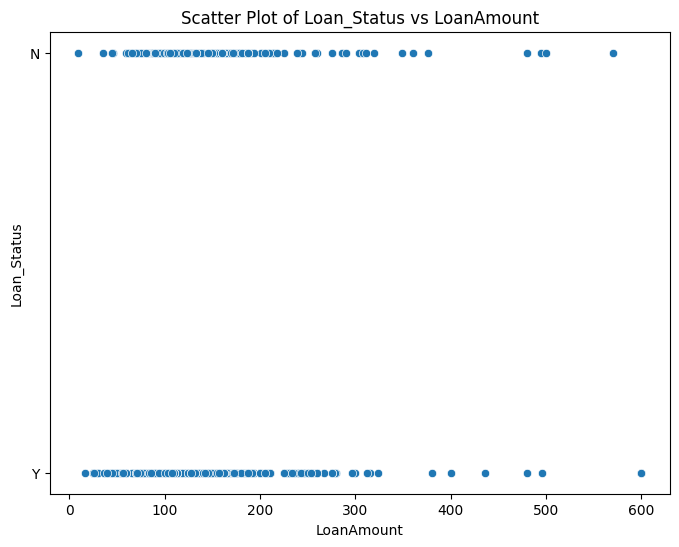

In [ ]:
plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(data=removeNA_df, x='LoanAmount', y='Loan_Status')
plt.title('Scatter Plot of Loan_Status vs LoanAmount')

# Show the plot
plt.show()

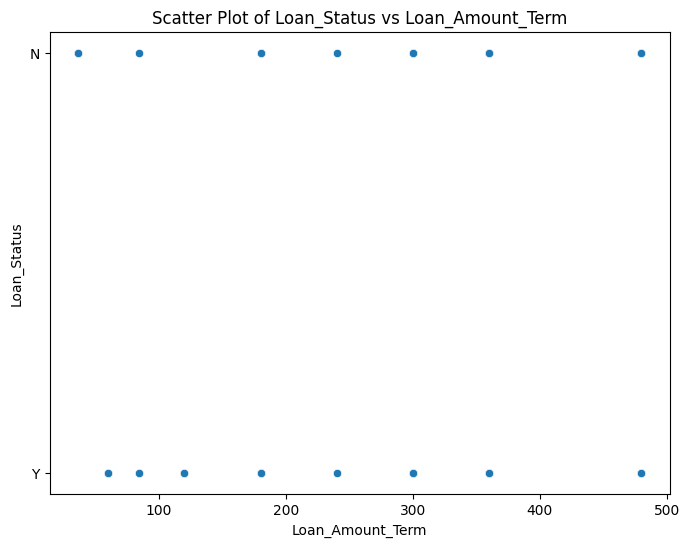

In [ ]:
plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(data=removeNA_df, x='Loan_Amount_Term', y='Loan_Status')
plt.title('Scatter Plot of Loan_Status vs Loan_Amount_Term')

# Show the plot
plt.show()

Do you think these scatter plots gave you valuable information about the Loan_Status?

**No, scatter plots are not typically suitable for visualizing and not sufficient**

Group your dataframe by Loan_Status on the median Value

In [ ]:
median_values = removeNA_df.groupby('Loan_Status').median()
print(median_values)

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                     3871.0                0.0       128.0             360.0   
Y                     3858.5             1211.5       128.0             360.0   

             Credit_History  
Loan_Status                  
N                       1.0  
Y                       1.0  


<ipython-input-27-8f7c08fd8c33>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_values = removeNA_df.groupby('Loan_Status').median()


What did you deduce?

**CoapplicantIncome play a huge role about acceptance of the loan**

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [ ]:
features_to_remove = ['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
filtered_df = removeNA_df.drop(features_to_remove, axis=1)


print(filtered_df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   CoapplicantIncome  Credit_History Property_Area Loan_Status  
1             1508.0             1.0         Rural           N  
2                0.0             1.0         Urban           Y  
3             2358.0             1.0         Urban           Y  
4                0.0             1.0         Urban           Y  
5             4196.0             1.0         Urban           Y  


## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [ ]:
filtered_df['Dependents'] = filtered_df['Dependents'].replace('3+', 3)
filtered_df['Dependents'] = pd.to_numeric(filtered_df['Dependents'])#column is treated as a numerical feature by the machine learning algorithms.


##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [ ]:
# Convert 'Education' column into binary categorical values (1 or 0)
filtered_df['Education'] = filtered_df['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)

print(filtered_df.head())
print(filtered_df.head())


    Loan_ID Gender Married  Dependents  Education Self_Employed  \
1  LP001003   Male     Yes           1          1            No   
2  LP001005   Male     Yes           0          1           Yes   
3  LP001006   Male     Yes           0          0            No   
4  LP001008   Male      No           0          1            No   
5  LP001011   Male     Yes           2          1           Yes   

   CoapplicantIncome  Credit_History Property_Area Loan_Status  
1             1508.0             1.0         Rural           N  
2                0.0             1.0         Urban           Y  
3             2358.0             1.0         Urban           Y  
4                0.0             1.0         Urban           Y  
5             4196.0             1.0         Urban           Y  
    Loan_ID Gender Married  Dependents  Education Self_Employed  \
1  LP001003   Male     Yes           1          1            No   
2  LP001005   Male     Yes           0          1           Yes   
3  LP0

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [ ]:
# Fill missing categorical and discrete data with mode
categorical_columns = ['Dependents', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status' ]
for col in categorical_columns:
    filtered_df[col].fillna(filtered_df[col].mode()[0], inplace=True)

continuous_columns = ['CoapplicantIncome']
for col in continuous_columns:
    filtered_df[col].fillna(filtered_df[col].mean(), inplace=True)

# Display the updated dataframe
print(filtered_df.head())



    Loan_ID Gender Married  Dependents  Education Self_Employed  \
1  LP001003   Male     Yes           1          1            No   
2  LP001005   Male     Yes           0          1           Yes   
3  LP001006   Male     Yes           0          0            No   
4  LP001008   Male      No           0          1            No   
5  LP001011   Male     Yes           2          1           Yes   

   CoapplicantIncome  Credit_History Property_Area Loan_Status  
1             1508.0             1.0         Rural           N  
2                0.0             1.0         Urban           Y  
3             2358.0             1.0         Urban           Y  
4                0.0             1.0         Urban           Y  
5             4196.0             1.0         Urban           Y  


## Check if any null value exist

In [ ]:
null_counts = filtered_df.isnull().sum()
print(null_counts)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [ ]:
encoded_df = filtered_df.copy()

categorical_columns_to_encode = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Property_Area', 'Education']


encoded_df = pd.get_dummies(encoded_df, columns=categorical_columns_to_encode, drop_first=True)
print(encoded_df.head())


    Loan_ID  CoapplicantIncome Loan_Status  Gender_Male  Married_Yes  \
1  LP001003             1508.0           N            1            1   
2  LP001005                0.0           Y            1            1   
3  LP001006             2358.0           Y            1            1   
4  LP001008                0.0           Y            1            0   
5  LP001011             4196.0           Y            1            1   

   Dependents_1  Dependents_2  Dependents_3  Self_Employed_Yes  \
1             1             0             0                  0   
2             0             0             0                  1   
3             0             0             0                  0   
4             0             0             0                  0   
5             0             1             0                  1   

   Credit_History_1.0  Property_Area_Semiurban  Property_Area_Urban  \
1                   1                        0                    0   
2                   1       

## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [ ]:
encoded_df['Loan_Status'] =encoded_df['Loan_Status'].map({'N': 0, 'Y': 1})

In [ ]:
encoded_df= encoded_df.drop(columns=['Loan_Status'])
# get the max of each column
#encoded_df['Loan_Status'] =encoded_df['Loan_Status'].map({'N': 0, 'Y': 1})

data_max = encoded_df.max()
data_max = data_max.drop(columns_to_remove)
data_max
encoded_df = encoded_df.divide(data_max)
encoded_df.describe()



KeyError: ignored

# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [ ]:
x = encoded_df.drop(columns=['Loan_Status'])
y = encoded_df['Loan_Status']

# Split the data into training (70%) and testing (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Print shapes of the split datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (336, 12)
y_train shape: (336,)
x_test shape: (144, 12)
y_test shape: (144,)


##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [ ]:
# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(x_train, y_train)
print("Logistic Regression model has been successfully trained.")


ValueError: ignored

##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [ ]:
y_pred = logreg_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy of the Logistic Regression model:", accuracy)


ValueError: ignored

#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

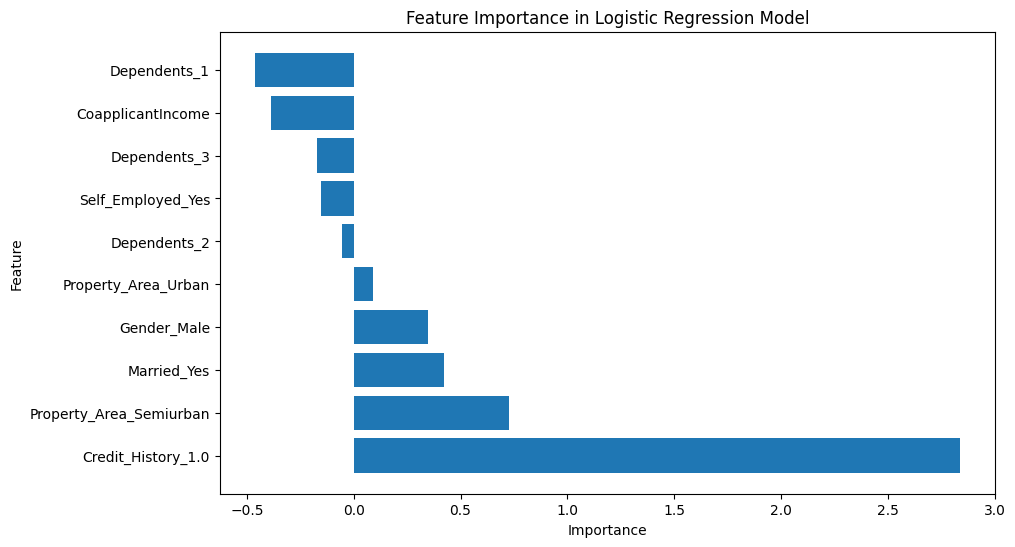

In [ ]:
feature_importance = logreg_model.coef_[0]

feature_names = x.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

What's the most important feature?

**Credit_History the most features affect the Loan acceptance**